In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(tf.__version__)



Instructions for updating:
non-resource variables are not supported in the long term
2.15.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train.shape, x_test.shape)



(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
model_test = tf.keras.Sequential([
    tf.keras.layers.Conv2D(5, (5, 5), activation='relu', input_shape=(28, 28, 1), padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(5, (5, 5), activation='relu', padding = "same"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(20, (5, 5), activation='relu', padding = 'same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
# padding 
# same : input == output size
# vaild : no padding
# https://itstory1592.tistory.com/23
# Build CNN model => 입력 이미지 크기가 작다?
# https://stackoverflow.com/questions/71378093/valueerror-negative-dimension-size-caused-by-subtracting-2-from-1-for-node-c


In [5]:
model_test.summary()
# 7x7x20 980x10

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 5)         130       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 5)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 5)         630       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 5)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 20)          2520      
                                                                 
 dropout (Dropout)           (None, 7, 7, 20)          0

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(5, (5, 5), activation='relu', input_shape=(28, 28, 1), padding = 'same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(5, (5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(20, (5, 5), activation='relu', padding = 'same'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])
# same 을 안 넣으면 자동으로 padding을 넣어서 계산

In [7]:

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=50, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)





Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59500/60000 [============================>.] - ETA: 0s - loss: 0.2911 - acc: 0.9086

c:\Users\chaey\anaconda3\envs\py39_xai\lib\site-packages\keras\src\engine\training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 5s 79us/sample - loss: 0.2893 - acc: 0.9092 - val_loss: 0.0790 - val_acc: 0.9742
Epoch 2/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1014 - acc: 0.9687 - val_loss: 0.0475 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0784 - acc: 0.9758 - val_loss: 0.0395 - val_acc: 0.9858
Epoch 4/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0651 - acc: 0.9791 - val_loss: 0.0418 - val_acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0572 - acc: 0.9819 - val_loss: 0.0306 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0528 - acc: 0.9831 - val_loss: 0.0335 - val_acc: 0.9902
Epoch 7/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.0490 - acc: 0.9843 - val_loss: 0.0294 - val_acc: 0.9902
Epoch 8/10
60000/60000 [==============

1. 계층별 활성화 함수 결과를 출력하는 코드 : getActivations
2. LRP를 수행할 이미지 하나를 부르기
3. 합성곱 신경망의 은닉 계층마다 활성화 함수를 구하는 코드
4. 합성곱 신경망에 이미지를 입력하고 out_y 예측 결과를 구하는 코드
5. 학습된 신경망으로부터 분류 가능성이 최대가 되는 카테고리를 구하는 코드
6. 완전 연결 신경망에서 역전파 기울기를 구하는 수도 코드 : getGradient 
7. f_x로부터 바로 직전 은닉층의 타당성 전파 값을 구하는 코드
8. FC 연결에서 LRP를 수행하는 코드. 예제 7.8의 역전파 기울기를 구하는 코드에 타당성 변수(relevance)를 곱한다 : backprop_dense
9. 예제 7.9에서 만든 LRP 공식으로 𝑅3를 구하는 코드



























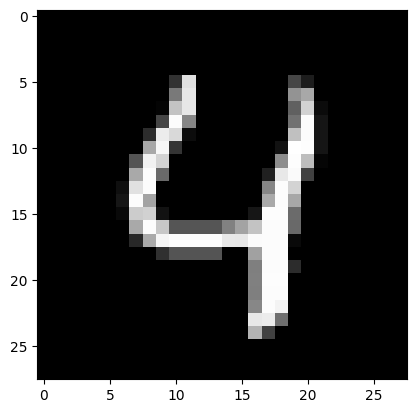

In [9]:
# 예제 7.4 LRP를 수행할 이미지 하나를 부르는 과정

# show test image
idx = 4
imageToUse = x_test[idx]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap='gray')

In [10]:

# 모델에 정의된 층들 가져오기
layers = model.layers

# 각 층에서 가중치와 편향을 추출하여 리스트에 저장
weights = []
biases = []
for layer in layers:
    # 가중치와 편향 추출
    if layer.weights:
        layer_weights = layer.weights[0]  # 가중치
        layer_biases = layer.weights[1]   # 편향
        weights.append(layer_weights)
        biases.append(layer_biases)

In [11]:

# 이미지를 모델에 입력하여 예측 결과를 구하기
predict = model.predict(imageToUse.reshape(1, 28, 28, 1))

# 예측 결과 출력
for idx, prob in enumerate(predict[0]):
    print('[{}] {:.2%}'.format(idx, prob))

[0] 0.00%
[1] 0.00%
[2] 0.00%
[3] 0.00%
[4] 100.00%
[5] 0.00%
[6] 0.00%
[7] 0.00%
[8] 0.00%
[9] 0.00%


c:\Users\chaey\anaconda3\envs\py39_xai\lib\site-packages\keras\src\engine\training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


In [12]:
# 예제 7.7 학습된 합성곱 신경망으로부터 분류 가능성이 최대가 되는 카테고리를 구하는 코드

# 예측된 확률 중 가장 높은 값을 구합니다.
max_probability = np.max(predict)

print("가장 높은 확률:", max_probability)


가장 높은 확률: 0.9999999


In [13]:
# 예제 7.8 완전 연결 신경망에서 역전파 기울기를 구하는 수도 코드

# get FC layer gradient

def getGradient(activation, weight, bias):
    # Forward pass
    W = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.matmul(activation, W) + b

    # Backward pass
    dX = tf.matmul(1 / z, tf.transpose(W))
    return dX

In [14]:
def backprop_dense(activation, weight, bias, relevance):
    # Forward pass
    z = tf.matmul(activation, weight) + bias
    z_p = tf.maximum(0.0, z) + 1e-9  # Add a small constant to prevent division by zero

    # Backward pass
    s = relevance / z_p
    c = tf.matmul(s, tf.transpose(weight))
    return activation * c


In [15]:
def get_activations(layer, image):
    units = layer(image.reshape(1, 28, 28, 1))
    return units


In [16]:
imageToUse = imageToUse.reshape(-1, 784)

# 모델의 레이어 리스트 가져오기
layers = model.layers
activations = []

# 각 레이어에서 활성화 값을 가져와서 activations에 추가
for layer in layers:
    # 입력 이미지에 대해 레이어의 활성화 값을 계산
    activation = layer(imageToUse)
    activations.append(activation)

# 계층별 활성화 함수 결과 출력
for i, activation in enumerate(activations):
    print(f"Activation of layer {i + 1}: {activation}")


ValueError: Shape must be rank 4 but is rank 2 for '{{node conv2d_3_1/Conv2D}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="SAME", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](Const, conv2d_3_1/Conv2D/ReadVariableOp)' with input shapes: [1,784], [5,5,1,5].

: 

In [ ]:
#  예제 7.9 f_x로부터 바로 직전 은닉층의 타당성 전파 값을 구하는 코드
R4 = predict
R4.shape

(1, 10)

In [ ]:
# 예제 7.10 예제 7.9에서 만든 LRP 공식으로 𝑅3를 구하는 코드

# layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3]
# (1, 28, 28, 5) (1, 14, 14, 5) (1, 7, 7, 20)
# activation, weights, biases
a = activations.pop()
w = weights.pop()
b = biases.pop()

print(a.shape)
print(w.shape)

R3 = backprop_dense(a.reshape(1,980), w, b, R4)

print(R3.shape)


(None, 10)
(980, 10)


AttributeError: 'KerasTensor' object has no attribute 'reshape'

In [ ]:
# 예제 7.11-(1) 언풀링 연산에서 LRP를 구하는 코드

from tensorflow.python.ops import gen_nn_ops

def backprop_pooling(activation, relevance):
    # kernel size, strides
    # if z is zero
    ksize = strides = [1, 2, 2, 1]
    z = tf.nn.max_pool(activation, ksize, strides, padding='SAME') + 1e-10
    s = relevance / z
    # input, argmax, argmax_mask
    c = gen_nn_ops.max_pool_grad(activation, z, s, ksize, strides, padding='SAME')
    return activation * c


In [ ]:
# 예제 7.11-(2) 역합성곱 연산에서 LRP를 구하는 코드

def backprop_conv(activation, weight, bias, relevance):
    strides = [1, 1, 1, 1]
    w = tf.maximum(0., weight)
    b = tf.maximum(0., bias)
    z = tf.nn.conv2d(activation, w, strides, padding='SAME')
    z = tf.nn.bias_add(z, b)
    s = relevance / z
    c = tf.nn.conv2d_backprop_input(tf.shape(activation), w, s, strides, padding='SAME')
    return activation * c


In [ ]:
# 예제 7.12 𝑅3 벡터로부터 역합성곱과 언풀링 연산을 수행하고 𝑅2 벡터를 구하는 코드

# layers = [hidden_1, pool_1, hidden_2, pool_2]
# (1, 28, 28, 5)(1, 14, 14, 5)(1, 7, 7, 20)
# activation, weights, biases
w = weights.pop()
b = biases.pop()
p = activations.pop()
a = activations.pop()
print(p.shape)

# convolution backprop
R_conv = backprop_conv(p, w, b, tf.reshape(R3, [1, 7, 7, 20]))
print(R_conv.shape)
R2 = backprop_pooling(a, R_conv)
print(R2.shape)

(1, 7, 7, 5)

(1, 7, 7, 5)

(1, 14, 14, 5)


In [ ]:
# 예제 7.11 𝑅2에서 역합성곱과 언풀링 과정을 수행하고 𝑅1 벡터를 구하는 코드

# layers = [hidden_1, pool_1]
# (1, 28, 28, 5)(1, 14, 14, 5)
# activation, weights, biases
w = weights.pop()
b = biases.pop()
p = activations.pop()
a = activations.pop()

# convolution backprop
R_conv = backprop_conv(p, w, b, R2)
print(R_conv.shape)

R1 = backprop_pooling(a, R_conv)
print(R1.shape)
print(np.sum(sess.run(R1)))


(1, 14, 14, 5)
(1, 28, 28, 5)
0.97247183


In [ ]:
# 예제 7.12 𝑅1 결과에서 원본 이미지까지 LRP를 수행하는 코드

img_activations = getActivations(x_image, imageToUse)
w = weights.pop()
b = biases.pop()
R0 = backprop_conv(img_activations, w, b, R1)
LRP_out = sess.run(R0)

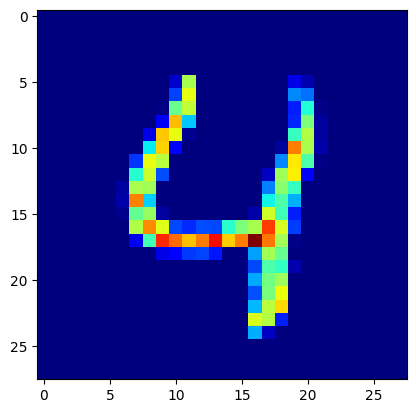

In [ ]:
# 예제 7.13 원본 이미지 형태로 타당성 전파를 수행하고 결과물을 이미지 형태로 출력하는 코드

plt.imshow(LRP_out.reshape(28, 28), interpolation="nearest", cmap=plt.cm.jet)

In [ ]:
# 예제 7.13 합성곱 신경망 전체에 대해 LRP를 수행하는 코드

def getLRP(img):
    predict = sess.run(out_y, feed_dict={x: img.reshape([-1, 784]), keep_prob:1.0})[0]
    layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3]
    weights = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*weights.*')
    biases = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope='.*biases.*')

    # layers = [hidden_1, pool_1, hidden_2, pool_2, hidden_3]
    activations = []
    for layer in layers:
        activations.append(getActivations(layer, img))

    # get f_x
    f_x = max(predict)

    # get R4
    predict[predict < 0] = 0
    R4 = predict

    # get R3
    a = activations.pop()
    w = weights.pop()
    b = biases.pop()
    R3 = backprop_dense(a.reshape(1,980), w, b, R4)

    # get R2
    w = weights.pop()
    b = biases.pop()
    p = activations.pop()
    a = activations.pop()
    R_conv = backprop_conv(p, w, b, tf.reshape(R3, [1, 7, 7, 20]))
    R2 = backprop_pooling(a, R_conv)

    # get R1
    w = weights.pop()
    b = biases.pop()
    p = activations.pop()
    a = activations.pop()
    R_conv = backprop_conv(p, w, b, R2)
    R1 = backprop_pooling(a, R_conv)

    # get R0
    img_activations = getActivations(x_image, img)
    w = weights.pop()
    b = biases.pop()
    R0 = backprop_conv(img_activations, w, b, R1)
    LRP_out = sess.run(R0)
    return LRP_out


In [ ]:
# 예제 7.13 합성곱 신경망 전체에 대해 LRP를 수행하는 코드

# get MNIST dataset index dict
mnist_dict = {}
idx = 0
for i in y_test:
    label = np.where(i == np.amax(i))[0][0]
    if mnist_dict.get(label):
        mnist_dict[label].append(idx)
    else:
        mnist_dict[label] = [idx]
    idx += 1

# get LRP
nums = []
for i in range(10):
    img_idx = mnist_dict[i][0]
    img = mnist.test.images[img_idx]
    lrp = getLRP(img)
    nums.append(lrp)

# plot images
plt.figure(figsize=(20,10))
for i in range(2):
    for j in range(5):
        idx = 5 * i + j
        plt.subplot(2, 5, idx + 1)
        plt.title('digit: {}'.format(idx))
        plt.imshow(nums[idx].reshape([28, 28]), cmap=plt.cm.jet)
        plt.colorbar(orientation='horizontal')
plt.tight_layout()
sess.close()


AttributeError: module 'keras.api._v2.keras.datasets.mnist' has no attribute 'test'

In [ ]:
tf.raw_ops # 아주 밑에 단까지 가는!!..